In [1]:
import BondGraphTools as bgt
model = bgt.new(name="Diffusion")

In [2]:
K_A=5263.6085
K_B=3803.6518
R=8.314
T=300
Ce_A = bgt.new("Ce", name="A", library="BioChem", value={'k':K_A , 'R':R, 'T':T})
Ce_B= bgt.new("Ce", name="B", library="BioChem", value={'k':K_B, 'R':R, 'T':T})
reaction = bgt.new("Re", library="BioChem", value={'r':None, 'R':R, 'T':T})

A_junction = bgt.new("0")
B_junction = bgt.new("0")

bgt.add(model, Ce_A, Ce_B,A_junction, B_junction, reaction)

In [3]:
bgt.connect(Ce_A, A_junction)
bgt.connect(A_junction, reaction)
bgt.connect(reaction, B_junction)
bgt.connect(B_junction, Ce_B)

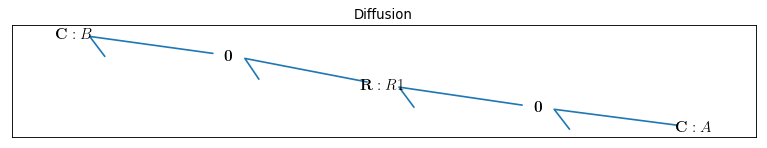

In [5]:
bgt.draw(model)

In [6]:
model.state_vars

{'x_0': (C: A, 'q_0'), 'x_1': (C: B, 'q_0')}

In [7]:
model.constitutive_relations

[dx_0 + 10527217*u_0*x_0/2000 - 19018259*u_0*x_1/5000,
 dx_1 - 10527217*u_0*x_0/2000 + 19018259*u_0*x_1/5000]

In [8]:
import matplotlib.pyplot as plt
x0 = {"x_0":1, "x_1":0}
t_span = [0,3]

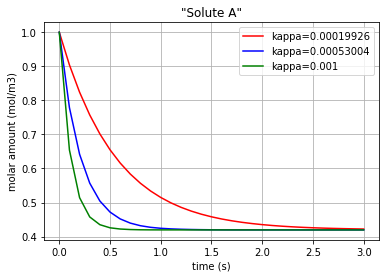

In [9]:
for c, kappa, label in [('r', 0.00019926, 'kappa=0.00019926'), ('b', 0.00053004, 'kappa=0.00053004'), ('g', 0.001,'kappa=0.001')]:
    t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})
    plt.plot(t,x[:,0], c, label=label)
    plt.title('"Solute A"')
    plt.xlabel("time (s)")
    plt.ylabel("molar amount (mol/m3)")
    plt.legend(loc='upper right')
    plt.grid()
    


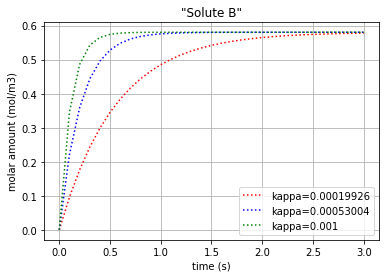

In [10]:
for c, kappa, label in [('r', 0.00019926, 'kappa=0.00019926'), ('b', 0.00053004, 'kappa=0.00053004'), ('g', 0.001,'kappa=0.001')]:
    t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})
    plt.plot(t,x[:,1], c+':', label=label)
    plt.title('"Solute B"')
    plt.xlabel("time (s)")
    plt.ylabel("molar amount (mol/m3)")
    plt.legend(loc='lower right')
    plt.grid()

In [11]:
# Calculating the molar concentration flow rate of both the solutes
#  dq_Ce_A/dt = v_Ce_A (flow in the Ce_A)
#  dq_Ce_B/dt = v_Ce_B (flow in the Ce_B)

import matplotlib.pyplot as plt
import numpy as np

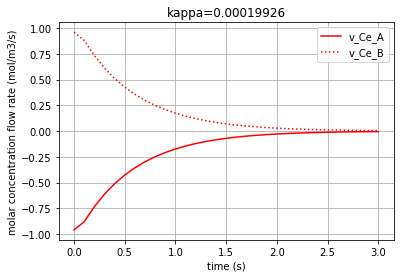

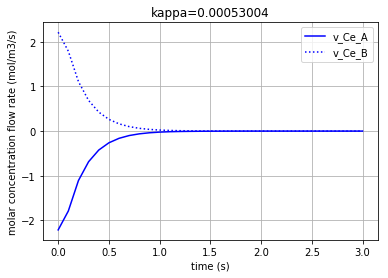

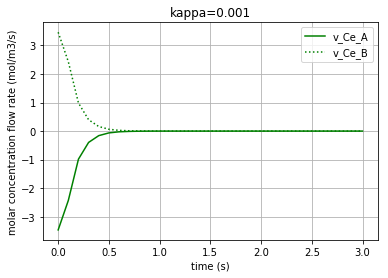

In [12]:
for c, kappa, title in [('r', 0.00019926, 'kappa=0.00019926'), ('b', 0.00053004, 'kappa=0.00053004'), ('g', 0.001,'kappa=0.001')]:
    t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})
    f = np.array(x[:,0], dtype=float)
    v_Ce_A=np.gradient(f,0.1)
    
    f = np.array(x[:,1], dtype=float)
    slope=np.gradient(f,0.1)
    v_Ce_B=slope

    plt.plot(t,v_Ce_A, c, label='v_Ce_A')
    plt.plot(t,v_Ce_B, c+':', label='v_Ce_B')
    leg1=plt.legend(loc='upper right')
    plt.xlabel("time (s)")
    plt.ylabel("molar concentration flow rate (mol/m3/s)")
    plt.title(title)
    plt.grid()    
    plt.show()


c:\users\nsha457\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


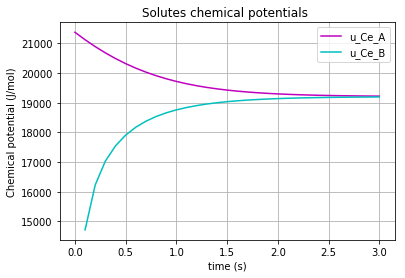

In [12]:
# Calculating & plotting the solutes chemical potentials (u_Ce_A & u_Ce_B)
# u=R.T.ln(K.q)
# for kappa=0.00019926

kappa=0.00019926
import math

t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa}) 

q_Ce_A = np.array(x[:,0], dtype=float)
u_Ce_A=R*T*np.log(K_A*q_Ce_A)


q_Ce_B = np.array(x[:,1], dtype=float)
u_Ce_B=R*T*np.log(K_B*q_Ce_B)

plt.plot(t,u_Ce_A, 'm', label='u_Ce_A')
plt.plot(t,u_Ce_B, 'c', label='u_Ce_B')
plt.legend(loc='upper right')
plt.xlabel("time (s)")
plt.ylabel("Chemical potential (J/mol)")
plt.title('Solutes chemical potentials ')
plt.grid()   